<a href="https://colab.research.google.com/github/acaaattunde2012/Practise/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **ML ALGORITHMS TO PREDICT IRIS CATEGORIES OF FLOWERS**

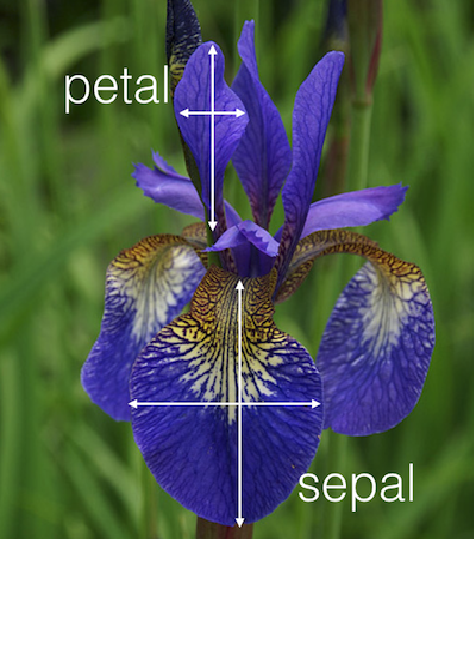

### **Classification Models Used**

 

*   **Logistic Regression**
*   **Decision Tree**
*   **Naive Bayes**






 

#### **Importing Libraries**

In [14]:
# Exploration, Statistical And Visualization
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modelling And Prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,roc_auc_score,f1_score

# import warnings
import warnings
warnings.filterwarnings('ignore')

**About The Datatset**

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.[1] It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.[2] Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".[3]

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

**Data Source**

The dataset was downloaded from Kaggle website. The link is shown below -

https://www.kaggle.com/datasets/vikrishnan/iris-dataset?select=iris.data.csv

 **Data Reading And Cleaning**

In [15]:
# Load and view the 1st 5 rows of the dataset
iris = pd.read_csv('/content/iris.csv',header = None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


 **Change The Column Heading**

In [16]:
header = ['sepal length (cm)', 'sepal width (cm)',	'petal length (cm)',	'petal width (cm)', 'target']
iris.columns =header

In [17]:
# More information about the Dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
# Show the shape of Dataset
iris.shape

(150, 5)

 **Check for missing values**

In [19]:

iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [20]:
iris.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

**Dataset Statistics**

In [21]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


**Visualization And Graphing**

**Visualizing Relationship Among The Independent Features**

<Figure size 1080x1080 with 0 Axes>

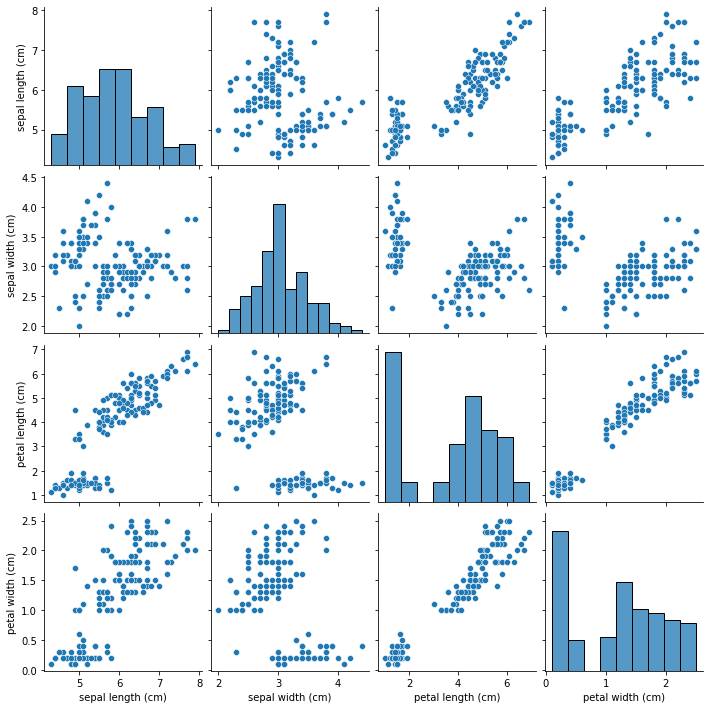

In [23]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis Of All Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.pairplot(iris)

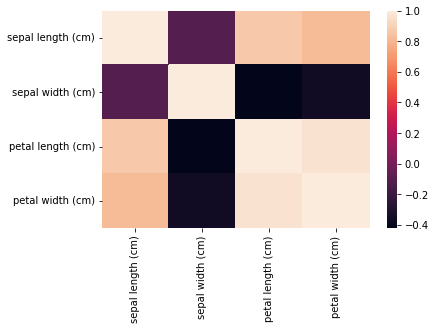

In [24]:
sns.heatmap(iris.corr())

#### **Observations On The Features Relationship**
There seems to be positive correlation between  the following features

*   sepal length vs petal length
*   petal width vs petal length
*   petal width vs sepal length


**Visualizing Dataset Distributions**

In [25]:
iris_dist = iris.drop(columns = 'target', axis = 0)
columns =iris_dist.columns

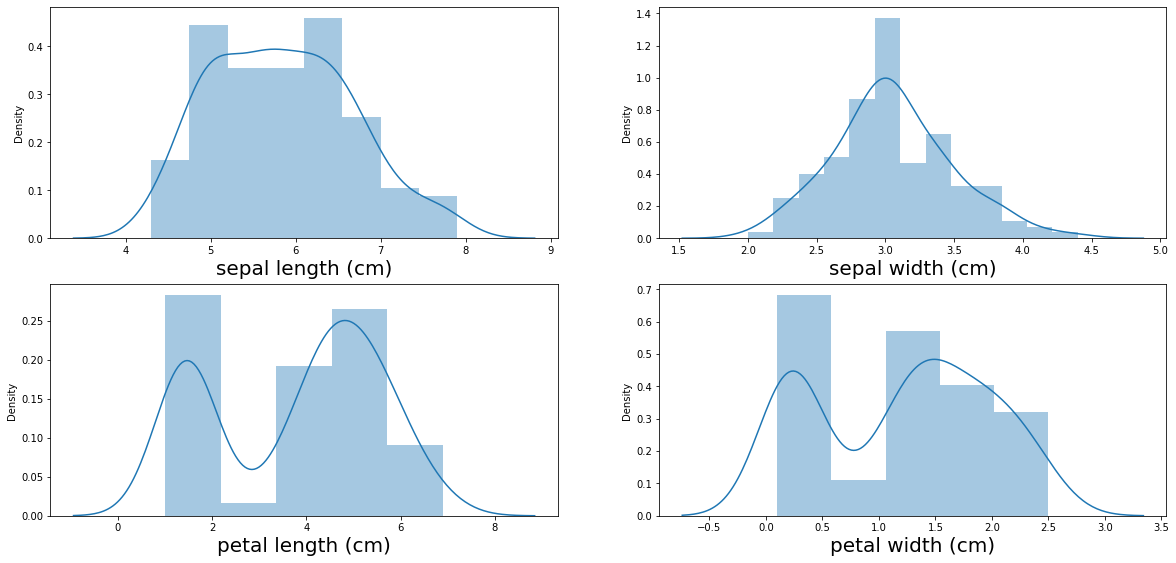

In [26]:
plt.figure(figsize=(20,40), facecolor = 'white')
plotnumber = 1
for column in columns:
  if plotnumber <= len(columns):
    ax = plt.subplot(8,2,plotnumber)
    sns.distplot(iris[column])
    plt.xlabel(column, fontsize =20)
  plotnumber+=1
plt.show()

**Observations On Dataset Distribution**

sepal length and sepal width seem to be normally distributed while the petal length and petal width are not well distributed

**Checking And Visualizing Dataset Imbalance**

In [27]:
iris['target'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

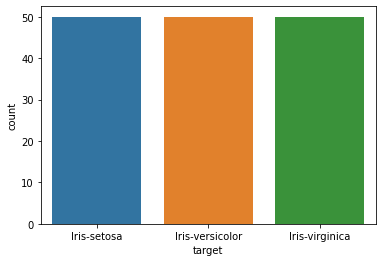

In [28]:
sns.countplot(x=iris['target'])
plt.suptitle = 'Count of Dependent Feature'
plt.show()

**Split Dataset Into Independent and Dependent Features**

In [29]:
iris.shape

(150, 5)

In [30]:
X = iris.iloc[:, :-1]
X.shape

(150, 4)

In [31]:
y = iris.iloc[:,-1]
y.shape

(150,)

**Spliting The Dataset Into Training And Testing Sets**

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=43)

In [33]:
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


In [34]:
print(y_train.shape)
print(y_test.shape)

(112,)
(38,)


**Dataset Standardization**

In [35]:
scaler= StandardScaler()
x_train_stnd= scaler.fit_transform(x_train)
x_test_stnd =scaler.transform(x_test)

In [36]:
# Confirm that standardization is carried out
print(f'The Standard Deviation of x_train_std is - {x_train_stnd.std()}')
print(f'The Standard Deviation of x_train_std is - {x_test_stnd.std()}')

The Standard Deviation of x_train_std is - 1.0
The Standard Deviation of x_train_std is - 1.038447304414658


**Logistic Rgression Model**

In [53]:
from sklearn.linear_model import LogisticRegression

# Create your model
log_reg=LogisticRegression()

In [54]:
# Train the model
log_reg.fit(x_train_stnd,y_train)

LogisticRegression()

In [55]:
# Make prediction
y_pred_actual = log_reg.predict(x_train_stnd)
y_pred =log_reg.predict(x_test_stnd)

**Model Accuracy on Test Data**

In [43]:
print(classification_report(y_train, y_pred_actual))
print(f'The accuracy score is - {accuracy_score(y_train, y_pred_actual)}')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        36
Iris-versicolor       0.92      0.92      0.92        38
 Iris-virginica       0.92      0.92      0.92        38

       accuracy                           0.95       112
      macro avg       0.95      0.95      0.95       112
   weighted avg       0.95      0.95      0.95       112

The accuracy score is - 0.9464285714285714


**Model Accuracy on Training Data**

In [59]:
print(classification_report(y_test, y_pred))
print(f' The accuracy score is - {accuracy_score(y_test,y_pred)}')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38

 The accuracy score is - 0.9736842105263158


**Y_Test Vs Y_Predict - Analysis And Visualization**

In [44]:
# Combine y_test and y_predict to form a dataframe
targets = {'y_test': y_test, 'y_pred': y_pred}
df_target = pd.DataFrame(targets)
df_target.head()

,y_test,y_pred
30,Iris-setosa,Iris-setosa
0,Iris-setosa,Iris-setosa
138,Iris-virginica,Iris-virginica
67,Iris-versicolor,Iris-versicolor
105,Iris-virginica,Iris-virginica


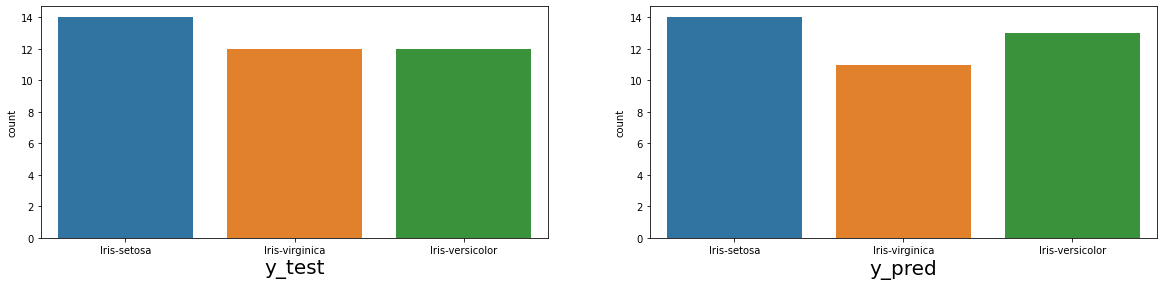

In [45]:
# Plotting the two(2) targets - Y_Test And Y_Predict
columns =df_target.columns
plt.figure(figsize=(20,40), facecolor = 'white')
plotnumber = 1
for column in columns:
  if plotnumber <= len(columns):
    ax = plt.subplot(8,2,plotnumber)
    sns.countplot(df_target[column])
    plt.xlabel(column, fontsize =10)
  plotnumber+=1
plt.show()

**Decision Tree Classifier**

In [47]:
# import dependencies
from sklearn.tree import DecisionTreeClassifier

In [48]:
# Train the model
dtclassifier = DecisionTreeClassifier()
dtclassifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
# Make prediction
y_pred =dtclassifier.predict(x_test)

In [50]:
# Checking the accuracy of the model on test data
print(classification_report(y_test, y_pred))
print(f'The accuracy score is - {accuracy_score(y_test, y_pred)}')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.91      0.83      0.87        12

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38

The accuracy score is - 0.9210526315789473


**Naive Baye's Classifier**

In [ ]:
! pip install naive_bayes

In [68]:
# Import Naive Bayes Algorithms
from sklearn.naive_bayes import GaussianNB
naive_classifier = GaussianNB()


In [70]:
# Train The Algorithms
naive_classifier.fit(x_train_stnd,y_train)

GaussianNB()

In [72]:
# Model Prediction on both Training And Test Data
y_pred_naive = naive_classifier.predict(x_test_stnd)

In [74]:
print(classification_report(y_test,y_pred_naive))
print(f'The accuracy score is - {accuracy_score(y_test,y_pred_naive)}')

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

The accuracy score is - 1.0
